# Mod 4 Project Office Hours 

- 06/09/20

## Questions

- Explaining what words were important for a Neural Network
    - Look into classification from Lime, Yellowbrick, Eli5, 
    
- EDA/Visuals:
    - Word clouds - https://www.datacamp.com/community/tutorials/wordcloud-python
    - Bigrams - Looking for mutual information pmi.
    - Sentiment Analysis with Vader from NLTK
    - [Scattertext](https://github.com/JasonKessler/scattertext)
    
- Overlapping Multi-Class Classification Task (multi y-columns)
    - Loop through the columns in the training and test data to pull out each one and then run separate sklearn classification_report/confusion matrices
    - Since predictions form ANNs are probabilities, you will need to round each column to 0 or 1 before running through sklearn

## Data 

In [1]:
# !pip install -U seaborn

In [2]:
!pip install -U fsds_100719
from fsds_100719.imports import *

fsds_1007219  v0.7.22 loaded.  Read the docs: https://fsds.readthedocs.io/en/latest/ 


Handle,Package,Description
dp,IPython.display,Display modules with helpful display and clearing commands.
fs,fsds_100719,Custom data science bootcamp student package
mpl,matplotlib,Matplotlib's base OOP module with formatting artists
plt,matplotlib.pyplot,Matplotlib's matlab-like plotting module
np,numpy,scientific computing with Python
pd,pandas,High performance data structures and tools
sns,seaborn,High-level data visualization library based on matplotlib


[i] Pandas .iplot() method activated.


In [3]:
# %conda uninstall matplotlib

In [4]:
# %conda install -c conda-forge matplotlib


In [5]:
mpl.__version__

'3.2.1'

In [6]:
import matplotlib

In [7]:
matplotlib.__version__

'3.2.1'

In [8]:
!python --version

Python 3.6.9 :: Anaconda, Inc.


In [9]:
# import matplotlib as mpl
matplotlib.get_configdir()

'/Users/jamesirving/.matplotlib'

In [10]:
matplotlib.__file__

'/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/matplotlib/__init__.py'

In [11]:
import os,shutil,glob
# search_dir="/Users/jamesirving/Downloads/"

In [12]:
# with open('README.md') as f:
#     dp.display(dp.Markdown(f.read()))

<div style="display:block;border-left: 3px solid black;padding:2em;">  Build a model that can rate the sentiment of a Tweet based on its content.

</div>

In [13]:
# os.listdir(search_dir)

In [14]:
# files = list(filter(os.path.isfile, glob.glob(search_dir + "*")))
# files.sort(key=lambda x: os.path.getmtime(x))


In [15]:
os.listdir()

['student-NLP.ipynb',
 'judge-1377884607_tweet_product_company.csv',
 'time-series',
 'LICENSE.md',
 'student-recommendation.ipynb',
 'images',
 'ml-latest-small',
 '2.0',
 'Models',
 'student-pneumonia.ipynb',
 'README.md',
 '.gitignore',
 'CONTRIBUTING.md',
 '.ipynb_checkpoints',
 '.learn',
 '.git',
 'your-original-env.txt']

In [16]:
df = pd.read_csv('judge-1377884607_tweet_product_company.csv',encoding='latin-1')
df.head()

,tweet_text,emotion_in_tweet_is_directed_at,is_there_an_emotion_directed_at_a_brand_or_product
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,iPhone,Negative emotion
1,@jessedee Know about @fludapp ? Awesome iPad/i...,iPad or iPhone App,Positive emotion
2,@swonderlin Can not wait for #iPad 2 also. The...,iPad,Positive emotion
3,@sxsw I hope this year's festival isn't as cra...,iPad or iPhone App,Negative emotion
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,Google,Positive emotion


In [17]:
df['emotion_in_tweet_is_directed_at'].value_counts()

iPad                               946
Apple                              661
iPad or iPhone App                 470
Google                             430
iPhone                             297
Other Google product or service    293
Android App                         81
Android                             78
Other Apple product or service      35
Name: emotion_in_tweet_is_directed_at, dtype: int64

In [18]:
df.values

array([['.@wesley83 I have a 3G iPhone. After 3 hrs tweeting at #RISE_Austin, it was dead!  I need to upgrade. Plugin stations at #SXSW.',
        'iPhone', 'Negative emotion'],
       ["@jessedee Know about @fludapp ? Awesome iPad/iPhone app that you'll likely appreciate for its design. Also, they're giving free Ts at #SXSW",
        'iPad or iPhone App', 'Positive emotion'],
       ['@swonderlin Can not wait for #iPad 2 also. They should sale them down at #SXSW.',
        'iPad', 'Positive emotion'],
       ...,
       ["Google's Zeiger, a physician never reported potential AE. Yet FDA relies on physicians. &quot;We're operating w/out data.&quot; #sxsw #health2dev",
        nan, 'No emotion toward brand or product'],
       ['Some Verizon iPhone customers complained their time fell back an hour this weekend.  Of course they were the New Yorkers who attended #SXSW.',
        nan, 'No emotion toward brand or product'],
       ['\x8cÏ¡\x8eÏà\x8aü_\x8b\x81Ê\x8b\x81Î\x8b\x81Ò\x8b\x81£\x8b

In [17]:
df.isna().sum()

tweet_text                                               1
emotion_in_tweet_is_directed_at                       5802
is_there_an_emotion_directed_at_a_brand_or_product       0
dtype: int64

In [18]:
df['is_there_an_emotion_directed_at_a_brand_or_product'].value_counts()

No emotion toward brand or product    5389
Positive emotion                      2978
Negative emotion                       570
I can't tell                           156
Name: is_there_an_emotion_directed_at_a_brand_or_product, dtype: int64

In [19]:
df = df[~(df['is_there_an_emotion_directed_at_a_brand_or_product']=="I can't tell")]
df = df.drop(columns=['emotion_in_tweet_is_directed_at'])
df.head()

,tweet_text,is_there_an_emotion_directed_at_a_brand_or_product
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,Negative emotion
1,@jessedee Know about @fludapp ? Awesome iPad/i...,Positive emotion
2,@swonderlin Can not wait for #iPad 2 also. The...,Positive emotion
3,@sxsw I hope this year's festival isn't as cra...,Negative emotion
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,Positive emotion


In [20]:
print(df.isna().sum())
df.dropna(inplace=True)
print(df.isna().sum())

tweet_text                                            1
is_there_an_emotion_directed_at_a_brand_or_product    0
dtype: int64
tweet_text                                            0
is_there_an_emotion_directed_at_a_brand_or_product    0
dtype: int64


In [21]:
y = df['is_there_an_emotion_directed_at_a_brand_or_product'].rename('sentiment')
y.value_counts()

No emotion toward brand or product    5388
Positive emotion                      2978
Negative emotion                       570
Name: sentiment, dtype: int64

In [22]:
y.value_counts(1)

No emotion toward brand or product    0.602954
Positive emotion                      0.333259
Negative emotion                      0.063787
Name: sentiment, dtype: float64

In [23]:
import nltk,string

In [24]:
stopwords = nltk.corpus.stopwords.words('english')
stopwords += string.punctuation
stopwords

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [25]:
from nltk.tokenize import TweetTokenizer
tokenizer = TweetTokenizer()
# tokenizer.tokenize()

In [26]:
df['tweet_text'] 

0       .@wesley83 I have a 3G iPhone. After 3 hrs twe...
1       @jessedee Know about @fludapp ? Awesome iPad/i...
2       @swonderlin Can not wait for #iPad 2 also. The...
3       @sxsw I hope this year's festival isn't as cra...
4       @sxtxstate great stuff on Fri #SXSW: Marissa M...
                              ...                        
9088                        Ipad everywhere. #SXSW {link}
9089    Wave, buzz... RT @mention We interrupt your re...
9090    Google's Zeiger, a physician never reported po...
9091    Some Verizon iPhone customers complained their...
9092    Ï¡Ïàü_ÊÎÒ£Áââ_£â_ÛâRT @...
Name: tweet_text, Length: 8936, dtype: object

In [27]:
def clean_tweet(text):
    clean_text = tokenizer.tokenize(text)
    stopped_text = [w.lower() for w in clean_text if w.lower() not in stopwords]
    return stopped_text

In [28]:
df['text_stopped'] = df['tweet_text'].map(clean_tweet)
df

,tweet_text,is_there_an_emotion_directed_at_a_brand_or_product,text_stopped
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,Negative emotion,"[@wesley83, 3g, iphone, 3, hrs, tweeting, #ris..."
1,@jessedee Know about @fludapp ? Awesome iPad/i...,Positive emotion,"[@jessedee, know, @fludapp, awesome, ipad, iph..."
2,@swonderlin Can not wait for #iPad 2 also. The...,Positive emotion,"[@swonderlin, wait, #ipad, 2, also, sale, #sxsw]"
3,@sxsw I hope this year's festival isn't as cra...,Negative emotion,"[@sxsw, hope, year's, festival, crashy, year's..."
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,Positive emotion,"[@sxtxstate, great, stuff, fri, #sxsw, marissa..."
...,...,...,...
9088,Ipad everywhere. #SXSW {link},Positive emotion,"[ipad, everywhere, #sxsw, link]"
9089,"Wave, buzz... RT @mention We interrupt your re...",No emotion toward brand or product,"[wave, buzz, ..., rt, @mention, interrupt, reg..."
9090,"Google's Zeiger, a physician never reported po...",No emotion toward brand or product,"[google's, zeiger, physician, never, reported,..."
9091,Some Verizon iPhone customers complained their...,No emotion toward brand or product,"[verizon, iphone, customers, complained, time,..."


In [29]:
df['is_there_an_emotion_directed_at_a_brand_or_product'].isna().sum()

0

In [30]:
from sklearn.preprocessing import LabelEncoder,OrdinalEncoder
encoder = LabelEncoder()
# encoder = OrdinalEncoder()
df['target'] = encoder.fit_transform(df['is_there_an_emotion_directed_at_a_brand_or_product'])
df

,tweet_text,is_there_an_emotion_directed_at_a_brand_or_product,text_stopped,target
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,Negative emotion,"[@wesley83, 3g, iphone, 3, hrs, tweeting, #ris...",0
1,@jessedee Know about @fludapp ? Awesome iPad/i...,Positive emotion,"[@jessedee, know, @fludapp, awesome, ipad, iph...",2
2,@swonderlin Can not wait for #iPad 2 also. The...,Positive emotion,"[@swonderlin, wait, #ipad, 2, also, sale, #sxsw]",2
3,@sxsw I hope this year's festival isn't as cra...,Negative emotion,"[@sxsw, hope, year's, festival, crashy, year's...",0
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,Positive emotion,"[@sxtxstate, great, stuff, fri, #sxsw, marissa...",2
...,...,...,...,...
9088,Ipad everywhere. #SXSW {link},Positive emotion,"[ipad, everywhere, #sxsw, link]",2
9089,"Wave, buzz... RT @mention We interrupt your re...",No emotion toward brand or product,"[wave, buzz, ..., rt, @mention, interrupt, reg...",1
9090,"Google's Zeiger, a physician never reported po...",No emotion toward brand or product,"[google's, zeiger, physician, never, reported,...",1
9091,Some Verizon iPhone customers complained their...,No emotion toward brand or product,"[verizon, iphone, customers, complained, time,...",1


In [31]:
X = df['tweet_text'].copy()
y = df['target'].copy()
display(X.head(),y.head())

0    .@wesley83 I have a 3G iPhone. After 3 hrs twe...
1    @jessedee Know about @fludapp ? Awesome iPad/i...
2    @swonderlin Can not wait for #iPad 2 also. The...
3    @sxsw I hope this year's festival isn't as cra...
4    @sxtxstate great stuff on Fri #SXSW: Marissa M...
Name: tweet_text, dtype: object

0    0
1    2
2    2
3    0
4    2
Name: target, dtype: int64

In [32]:
y.value_counts(normalize=True)

1    0.602954
2    0.333259
0    0.063787
Name: target, dtype: float64

In [33]:
from sklearn.model_selection import train_test_split
X_tr,X_te,y_tr,y_te = train_test_split(X,y,stratify=y,random_state=42)

In [34]:
X_tr

2660    If you are heading to #sxsw make sure you have...
3157           Showing off Uzu iPad app. #tapworthy #sxsw
8020    Chris Messina from Google thinks a scope searc...
8693    Catching up with @mention in our hotel room af...
6573    RT @mention RT @mention It's not a rumor: Appl...
                              ...                        
506     Hey #SXSW folks please keep us posted on Googl...
8627    I need a Twitter app recommendation for my new...
6797    RT @mention Thrilled to have former Chief Tale...
9001    Apparently mobile #sxsw GO app is not compatib...
6166    So @mention is back from #sxsw and he's brough...
Name: tweet_text, Length: 6702, dtype: object

In [35]:
# from sklearn.datasets import fetch_20newsgroups
# categories = ['alt.atheism', 'soc.religion.christian','comp.graphics', 'sci.med']
# twenty_train = fetch_20newsgroups(subset='train', categories=categories, shuffle=True, random_state=42)
# twenty_train['data'][0]

In [36]:
# from sklearn.feature_extraction.text import CountVectorizer,TfidfTransformer,TfidfVectorizer
# from sklearn.naive_bayes import MultinomialNB
# from sklearn.linear_model import SGDClassifier
# from sklearn.pipeline import Pipeline
# from sklearn.ensemble import RandomForestClassifier
# from sklearn import metrics

# # tf_transformer = TfidfTransformer(use_idf=True)
# # tf_transformer.fit_transform()

In [37]:
# pipe_forest = Pipeline([('vectorize', CountVectorizer()),
#                 ('tfidf',TfidfTransformer()),
#                  ('clf',RandomForestClassifier(random_state=42))])
# pipe_bayes = Pipeline([('vectorize', CountVectorizer()),
#                 ('tfidf',TfidfTransformer()),
#                  ('clf',MultinomialNB())])

In [38]:
# pipe = Pipeline([('vectorize', CountVectorizer()),
#                 ('tfidf',TfidfTransformer()),
#                  ('clf',SGDClassifier(random_state=42,max_iter=5,tol=None))])


# def fit_evaluate_pipe(pipe,X_tr,X_te,y_tr,y_te):
#     pipe.fit(X_tr,y_tr)
#     y_hat_te = pipe.predict(X_te)
#     print(metrics.classification_report(y_te,y_hat_te,target_names=encoder.inverse_transform([0,1,2])))
#     metrics.plot_confusion_matrix(pipe,X_te,y_te,cmap='Blues',normalize='true',
#                                      display_labels=encoder.inverse_transform([0,1,2]),xticks_rotation=45)

In [39]:
# fit_evaluate_pipe(pipe,X_tr,X_te,y_tr,y_te)

In [40]:
# fit_evaluate_pipe(pipe_forest,X_tr,X_te,y_tr,y_te)

In [41]:
# fit_evaluate_pipe(pipe_bayes,X_tr,X_te,y_tr,y_te)

In [42]:
# from sklearn.utils.validation import check_is_fitted

# model = pipe.named_steps['clf']
# check_is_fitted(model)

# pipe.named_steps

In [43]:
# from sklearn.model_selection import GridSearchCV

# parameters = { 'vectorize__ngram_range': [(1, 1), (1, 2)],
#               'tfidf__use_idf': (True, False),
#               'clf__alpha': (1e-2, 1e-3),
#              'clf__class_weight':['balanced',None]}
# search = GridSearchCV(pipe,parameters,scoring='recall_weighted')

# search.fit(X_tr,y_tr)

# search.best_params_

In [44]:
# search.best_score_

In [45]:
# y_hat_te = search.predict(X_te)
# y_hat_tr = search.predict(X_tr)

# print(metrics.classification_report(y_te,y_hat_te))
# metrics.plot_confusion_matrix(search,X_te,y_te,cmap='Blues',normalize='true',
#                                  display_labels=encoder.inverse_transform([0,1,2]),xticks_rotation=45)

In [46]:
# print(metrics.classification_report(y_tr,y_hat_tr
#                                    ))
# metrics.plot_confusion_matrix(search,X_tr,y_tr,cmap='Blues',normalize='true',
#                                  display_labels=encoder.inverse_transform([0,1,2]),xticks_rotation=45)

# Neural Networks

In [47]:
X = df['tweet_text'].copy()
y = df['target'].copy()
display(X.head(),y.head())

0    .@wesley83 I have a 3G iPhone. After 3 hrs twe...
1    @jessedee Know about @fludapp ? Awesome iPad/i...
2    @swonderlin Can not wait for #iPad 2 also. The...
3    @sxsw I hope this year's festival isn't as cra...
4    @sxtxstate great stuff on Fri #SXSW: Marissa M...
Name: tweet_text, dtype: object

0    0
1    2
2    2
3    0
4    2
Name: target, dtype: int64

In [48]:
from keras.utils import to_categorical
y_ohe = to_categorical(y)
y_ohe

Using TensorFlow backend.


array([[1., 0., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       ...,
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.]], dtype=float32)

In [49]:
from sklearn.model_selection import train_test_split
X_tr,X_te,y_tr,y_te = train_test_split(X,y_ohe,stratify=y_ohe,random_state=42)

In [50]:
from keras.preprocessing.text import Tokenizer
NUM_WORDS = 10000
tokenizer =Tokenizer(num_words=NUM_WORDS)
# tokenizer

In [51]:
tokenizer.fit_on_texts(X_tr)
word_index = tokenizer.word_index
len(word_index)

8863

In [52]:
## X_tr to sequences
from keras.preprocessing.sequence import pad_sequences
X_tr_seq = tokenizer.texts_to_sequences(X_tr)
type(X_tr_seq)

list

In [53]:
X_tr_seq[0]

[7,
 2,
 417,
 100,
 236,
 204,
 1017,
 320,
 105,
 269,
 7,
 2,
 12,
 79,
 11,
 36,
 21,
 19,
 6,
 1,
 4]

In [54]:
list(map(len, X_tr_seq))

[21,
 29,
 16,
 18,
 18,
 7,
 16,
 16,
 24,
 19,
 21,
 13,
 16,
 13,
 17,
 14,
 15,
 13,
 21,
 24,
 19,
 18,
 18,
 24,
 25,
 20,
 26,
 21,
 13,
 18,
 18,
 21,
 12,
 26,
 25,
 18,
 18,
 10,
 19,
 26,
 25,
 25,
 10,
 16,
 21,
 19,
 23,
 13,
 14,
 19,
 18,
 18,
 12,
 28,
 20,
 23,
 20,
 18,
 12,
 22,
 15,
 19,
 21,
 23,
 12,
 21,
 16,
 15,
 24,
 24,
 29,
 9,
 26,
 20,
 18,
 24,
 10,
 8,
 20,
 14,
 17,
 13,
 28,
 23,
 20,
 14,
 23,
 16,
 18,
 28,
 24,
 11,
 21,
 17,
 20,
 27,
 21,
 19,
 22,
 21,
 12,
 16,
 18,
 17,
 21,
 11,
 21,
 16,
 15,
 9,
 23,
 22,
 16,
 9,
 28,
 16,
 23,
 25,
 10,
 25,
 20,
 12,
 21,
 16,
 15,
 19,
 16,
 20,
 8,
 13,
 22,
 15,
 22,
 14,
 21,
 23,
 15,
 28,
 16,
 12,
 19,
 18,
 20,
 13,
 21,
 22,
 20,
 10,
 17,
 12,
 16,
 10,
 18,
 19,
 17,
 18,
 25,
 19,
 23,
 23,
 25,
 16,
 19,
 24,
 16,
 12,
 20,
 23,
 16,
 18,
 13,
 10,
 20,
 19,
 21,
 12,
 24,
 23,
 12,
 18,
 22,
 22,
 22,
 22,
 19,
 16,
 18,
 20,
 17,
 21,
 26,
 19,
 18,
 22,
 22,
 23,
 8,
 20,
 13,
 21,
 15,
 1

In [55]:
## max seq length
MAX_SEQUENCE=100#max(list(map(lambda x: len(x),X_tr_seq)))
MAX_SEQUENCE

100

In [56]:
SEQUENCE_LENGTH= MAX_SEQUENCE
X_tr_seq = pad_sequences(X_tr_seq,MAX_SEQUENCE)
X_tr_seq[0]

array([   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    7,    2,  417,  100,  236,  204, 1017,  320,  105,
        269,    7,    2,   12,   79,   11,   36,   21,   19,    6,    1,
          4], dtype=int32)

In [57]:
X_te_seq = tokenizer.texts_to_sequences(X_te)
X_te_seq = pad_sequences(X_te_seq,MAX_SEQUENCE)

X_te_seq[0]

array([   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,   14,  776,    7,    2,
          1,    8,   19,  357,   45,   14,  619,  796, 1146,  496,  110,
        293], dtype=int32)

In [58]:
from keras.models import Sequential
from keras.layers import Embedding,Dense,Flatten

In [59]:
VOCAB_LEN = len(word_index)+1
SEQUENCE_LENGTH = MAX_SEQUENCE

In [60]:
BATCH_SIZE = 64
SEQUENCE_LENGTH

100

In [61]:
y_tr.shape[1]

3

In [62]:
from keras import callbacks
import os 
checkpoint_folder = 'Models/checkpoints/'
checkpoint_filename = "weights.{epoch:02d}-{val_accuracy:.2f}.hdf5"
checkpoint_path = checkpoint_folder+checkpoint_filename
os.makedirs(checkpoint_folder,exist_ok=True)
checkpoint_path

'Models/checkpoints/weights.{epoch:02d}-{val_accuracy:.2f}.hdf5'

In [63]:
checkpoint = callbacks.ModelCheckpoint(checkpoint_path,verbose=1,monitor='val_accuracy',
                                       save_best_only=True,save_weights_only=True)
earlystop = callbacks.EarlyStopping(monitor='val_accuracy',patience=2)
callbacks_list= [checkpoint,earlystop]

In [64]:
from keras.layers import Embedding,LSTM,GRU,GlobalMaxPool1D,Dropout,Dense,Bidirectional

model = Sequential()
embedding_size = 128
model.add(Embedding(NUM_WORDS, embedding_size, input_length=SEQUENCE_LENGTH))

model.add(Bidirectional(GRU(25, return_sequences=True)))
model.add(GlobalMaxPool1D())
model.add(Dropout(0.5))
model.add(Dense(50, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(3, activation='softmax'))

model.compile(loss='categorical_crossentropy', 
              optimizer='adam', 
              metrics=['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 100, 128)          1280000   
_________________________________________________________________
bidirectional_1 (Bidirection (None, 100, 50)           23100     
_________________________________________________________________
global_max_pooling1d_1 (Glob (None, 50)                0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 50)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 50)                2550      
_________________________________________________________________
dropout_2 (Dropout)          (None, 50)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 3)                

In [65]:
from keras.wrappers.scikit_learn import KerasClassifier


In [66]:
history = model.fit(X_tr_seq, y_tr, epochs=3, batch_size=32, validation_split=0.1)

/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/tensorflow/python/framework/indexed_slices.py:434: UserWarning:

Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.



Train on 6031 samples, validate on 671 samples
Epoch 1/3
6031/6031 [==============================] - 18s 3ms/step - loss: 0.8877 - accuracy: 0.5820 - val_loss: 0.8025 - val_accuracy: 0.6066
Epoch 2/3
6031/6031 [==============================] - 17s 3ms/step - loss: 0.7653 - accuracy: 0.6520 - val_loss: 0.7443 - val_accuracy: 0.6736
Epoch 3/3
6031/6031 [==============================] - 17s 3ms/step - loss: 0.6171 - accuracy: 0.7402 - val_loss: 0.7662 - val_accuracy: 0.6751


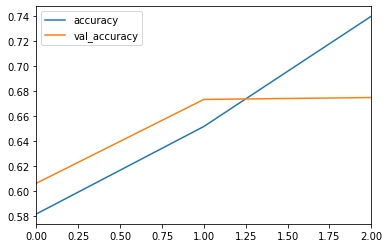

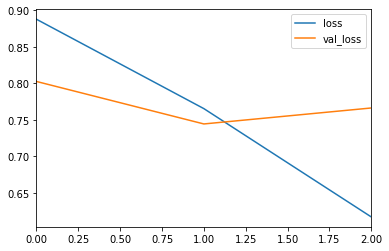

In [67]:
history_df = pd.DataFrame(history.history)
history_df[['accuracy','val_accuracy']].plot()
history_df[['loss','val_loss']].plot()

In [68]:
y_hat_te = model.predict(X_te_seq)
y_hat_te[0]

array([0.12388333, 0.5101563 , 0.36596036], dtype=float32)

In [69]:

def plot_confusion_matrix(conf_matrix, classes = None, normalize=True,
                          title='Confusion Matrix', cmap="Blues",
                          print_raw_matrix=False,
                          fig_size=(4,4)):
    """Check if Normalization Option is Set to True. 
    If so, normalize the raw confusion matrix before visualizing
    #Other code should be equivalent to your previous function.
    Note: Taken from bs_ds and modified
    - Can pass a tuple of (y_true,y_pred) instead of conf matrix.
    """
    import itertools
    import numpy as np
    import matplotlib.pyplot as plt
    import sklearn.metrics as metrics
    
    ## make confusion matrix if given tuple of y_true,y_pred
    if isinstance(conf_matrix, tuple):
        y_true = conf_matrix[0].copy()
        y_pred = conf_matrix[1].copy()
        
        if y_true.ndim>1:
            y_true = y_true.argmax(axis=1)
        if y_pred.ndim>1:
            y_pred = y_pred.argmax(axis=1)
        cm = metrics.confusion_matrix(y_true,y_pred)
    else:
        cm = conf_matrix
        
    ## Generate integer labels for classes
    if classes is None:
        classes = list(range(len(cm)))  
        
    ## Normalize data
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        fmt='.2f'
        thresh=0.5
    else:
        fmt= 'd'
        thresh=cm.max()/2
        
        
    fontDict = {
        'title':{
            'fontsize':16,
            'fontweight':'semibold',
            'ha':'center',
            },
        'xlabel':{
            'fontsize':14,
            'fontweight':'normal',
            },
        'ylabel':{
            'fontsize':14,
            'fontweight':'normal',
            },
        'xtick_labels':{
            'fontsize':10,
            'fontweight':'normal',
    #             'rotation':45,
            'ha':'right',
            },
        'ytick_labels':{
            'fontsize':10,
            'fontweight':'normal',
            'rotation':0,
            'ha':'right',
            },
        'data_labels':{
            'ha':'center',
            'fontweight':'semibold',

        }
    }

    # Create plot
    fig,ax = plt.subplots(figsize=fig_size)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title,**fontDict['title'])
    plt.colorbar()

    tick_marks = classes#np.arange(len(classes))


    plt.xticks(tick_marks, classes, **fontDict['xtick_labels'])
    plt.yticks(tick_marks, classes,**fontDict['ytick_labels'])

    # Determine threshold for b/w text
    thresh = cm.max() / 2.

    # fig,ax = plt.subplots()
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 color='black' if cm[i,j]<thresh else "white",#'darkgray',
                        **fontDict['data_labels']) #color="white" if cm[i, j] > thresh else "black"

    plt.tight_layout()
    plt.ylabel('True label',**fontDict['ylabel'])
    plt.xlabel('Predicted label',**fontDict['xlabel'])

    if print_raw_matrix:
        print_title = 'Raw Confusion Matrix Counts:'
        print('\n',print_title)
        print(conf_matrix)


    fig = plt.gcf()
    return fig


In [70]:
y_te

array([[0., 1., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       ...,
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.]], dtype=float32)

In [71]:
from sklearn import metrics
print(metrics.classification_report(y_te.argmax(axis=1),y_hat_te.argmax(axis=1)))

              precision    recall  f1-score   support

           0       0.94      0.11      0.19       142
           1       0.71      0.88      0.79      1347
           2       0.63      0.46      0.53       745

    accuracy                           0.69      2234
   macro avg       0.76      0.48      0.50      2234
weighted avg       0.70      0.69      0.66      2234



In [72]:
y_hat_te

array([[0.12388333, 0.5101563 , 0.36596036],
       [0.04853231, 0.39572224, 0.5557455 ],
       [0.02709775, 0.8569082 , 0.11599406],
       ...,
       [0.00329077, 0.9133329 , 0.08337645],
       [0.00553809, 0.93368566, 0.0607763 ],
       [0.01311834, 0.88161564, 0.10526601]], dtype=float32)

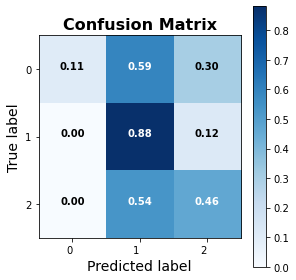

In [73]:
plot_confusion_matrix((y_te,y_hat_te));

In [74]:
print(y_hat_te.shape)
y_hat_te[:5]

(2234, 3)


array([[0.12388333, 0.5101563 , 0.36596036],
       [0.04853231, 0.39572224, 0.5557455 ],
       [0.02709775, 0.8569082 , 0.11599406],
       [0.0027322 , 0.9602901 , 0.03697773],
       [0.07102069, 0.47655848, 0.45242086]], dtype=float32)

In [75]:
y_hat_te.argmax(axis=1)[:5]

array([1, 2, 1, 1, 1])

In [76]:
y_te[0]

array([0., 1., 0.], dtype=float32)

In [77]:
y_te.argmax(axis=1)

array([1, 2, 1, ..., 1, 1, 1])

In [78]:
y_hat_te.argmax(axis=1)

array([1, 2, 1, ..., 1, 1, 1])

In [79]:
y_te[0]

array([0., 1., 0.], dtype=float32)

In [80]:
X_te_seq[0].shape

(100,)

In [81]:
tokenizer.sequences_to_texts([X_te_seq[0]])

['of course rt mention sxsw ipad store sold out of everything except 64gig wifi only white']

In [82]:
ex = X_te_seq[0]
ex

array([   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,   14,  776,    7,    2,
          1,    8,   19,  357,   45,   14,  619,  796, 1146,  496,  110,
        293], dtype=int32)

In [83]:
X_te.iloc[0]

'Of course! RT @mention #sxsw ipad store sold out of everything except 64gig wifi only white'

In [84]:
missed_rows = y_te.argmax(axis=1) != y_hat_te.argmax(axis=1)
missed_labels = y_te[missed_rows]
missed_texts = X_te_seq[missed_rows]
missed_texts

array([[  0,   0,   0, ...,  38,   4,   1],
       [  0,   0,   0, ..., 558,   4,   1],
       [  0,   0,   0, ...,  15, 604,  15],
       ...,
       [  0,   0,   0, ...,  18, 520, 273],
       [  0,   0,   0, ..., 126,   6,   1],
       [  0,   0,   0, ...,  43,  10,  15]], dtype=int32)

In [85]:
i=0
txt = missed_texts[i]
lbl = missed_labels[i]
print(i)
print(txt)
tokenizer.sequences_to_texts(missed_texts)

0
[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0 341 184 268   7   2  10   5  34
  69  24  33  49  61  35  83  38   4   1]


['looks very interesting rt mention google to launch major new social network called circles possibly today link sxsw',
 'rt mention apple to open pop up shop at sxsw report link sxsw',
 'rt mention yes the rumors are true come play with mention on ipad at our booth at sxsw exhibit hall 3 ipad ipad2 under the giant quot o quot',
 'mention it is a good question amp for most brands the answer is probably no except apple of course maybe netflix too sxsw',
 "the quiet before the storm at sxsw looking forward to seeing google's marissa mayer",
 'sxsw 2011 the google and bing smackdown in all its bloody banality link via mention mention',
 "google has quot got a lot better quot at protecting users' privacy with location based tools over past 12 months says mayer sxsw",
 'is the 100 the great of the ipad u tell me link sxswi sxsw',
 'technology apple opening pop up store in austin for sxsw geekfest apple our brian lam and the thousands link tech',
 'aron pilhofer from the new york times just 